<a href="https://colab.research.google.com/github/adv555/DataScience/blob/main/Hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

## **Часть первая:** Знакомство с Pandas.

---



In [ ]:
URL = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C"

In [ ]:
data = pd.read_html(URL, match='Коефіцієнт народжуваності в регіонах України', thousands='.',decimal=',')

In [ ]:
# Вывести первые строки таблицы с помощью метода head
data[0].head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,—,—
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,—


In [ ]:
# Определите количество строк и столбцов в датафрейме (атрибут shape)
table = pd.DataFrame(data[0])
table.shape

(28, 9)

In [ ]:
# Замените в таблице значения "—" на значения NaN
table.replace({'—': np.NaN}, inplace=True)
table.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN


In [ ]:
# Определите типы всех столбцов с помощью dataframe.dtypes
table.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object



*   **Замените типы не числовых колонок на числовые. Подсказка - это колонки где находился символ "—"**



In [ ]:

# Замените типы не числовых колонок на числовые. Подсказка - это колонки где находился символ "—"
# table.xs(['2014','2019'],axis=1).astype('float')
table.iloc[:,-2:] = table.iloc[:,-2:].astype('float')
table.dtypes



Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object



*   **Посчитайте, какая доля пропусков содержится в каждой колонке (используйте методы isnull и sum)**



In [ ]:
table.isna().sum()

Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64



*   **Удалите из таблицы данные по всей стране, последняя строчка таблицы**



In [ ]:
table_copy = pd.DataFrame.copy(table)
last_row = len(table_copy)-1
table_copy.drop(last_row, inplace=True)
table_copy.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN




*   **Замените отсутствующие данные в столбцах средними значениями по этим столбцам (метод fillna)**



In [183]:
table_copy = table_copy.fillna(table_copy.mean(numeric_only=True).round(decimals=1))
table_copy.head()



,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,11.1,8.0
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,8.0


In [ ]:
# Получите список регионов, где уровень рождаемости в 2019 году был выше среднего по Украине

table_copy[table_copy['2019'] > table_copy['2019'].mean()]['Регіон']

2             Волинська
6          Закарпатська
8     Івано-Франківська
12            Львівська
14              Одеська
16           Рівненська
20           Херсонська
23          Чернівецька
25                 Київ
Name: Регіон, dtype: object

In [ ]:
# В каком регионе была самая высокая рождаемость в 2014 году?

table_copy[['Регіон','2014']].max()

Регіон    Чернігівська
2014              14.8
dtype: object

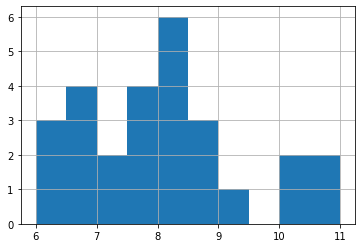

In [ ]:
# Постройте столбцовую диаграмму рождаемости по регионам в 2019 году
# table_copy['2019'].plot(kind='hist')
table_copy['2019'].hist()

# **Часть вторая:** Анализ файлов


---





**Проведите анализ файла [2017_jun_final.csv](https://drive.google.com/file/d/1Neaezn-96EkxDaQE4b7oU-3sdl5L_JKf/view?usp=share_link). Файл содержит результаты опроса разработчиков в июне 2017 года.**

In [ ]:
url_csv = 'https://raw.githubusercontent.com/adv555/DataScience/main/2017_jun_final.csv'

In [ ]:
# Прочитайте файл 2017_jun_final.csv с помощью метода read_csv

data = pd.read_csv(url_csv)

In [ ]:
# Прочитайте полученную таблицу используя метод head
data.head(3)

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV


In [ ]:
# Определите размер таблицы с помощью метода shape
data.shape

(8704, 25)

In [ ]:
# Определите типы всех столбцов с помощью dataframe.dtypes
data.dtypes

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [ ]:
# Посчитайте, какая доля пропусков содержится в каждой колонке (используйте методы isnull и sum)
data.isna().sum()

N                                      0
Должность                              0
Язык.программирования               3850
Специализация                       7219
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Университет                          358
Еще.студент                            0
Уровень.английского                    0
Предметная.область                   223
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
Валюта                              8694
cls             

In [ ]:
# Удалите все столбцы с пропусками, кроме столбца "Язык.программирования"
null_values = data.isnull().sum()[data.isnull().sum() > 0].index
data.drop(null_values[1:], axis=1, inplace=True)


In [ ]:
# Опять посчитайте, какая доля пропусков содержится в каждой колонке и убедитесь, что остался только столбец "Язык.программирования"
data.isna().sum()

N                                      0
Должность                              0
Язык.программирования               3850
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Еще.студент                            0
Уровень.английского                    0
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
dtype: int64

In [ ]:
# Удалите все строки в исходной таблице с помощью метода dropna
# data.dropna(inplace=True)

In [ ]:
# Определите новый размер таблицы с помощью метода shape
data.shape

(8704, 20)

In [ ]:
# Создайте новую таблицу python_data в которой будут только строки со специалистами указавшими язык программирования Python
python_data = data[data['Язык.программирования'] == 'Python' ]

In [ ]:
# Определите размер таблицы python_data с помощью метода shape
python_data.shape

(207, 20)

In [ ]:
# Используя метод groupby выполните группировку по столбцу "Должность"
python_data.groupby('Должность').sum()

,N,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Возраст,Еще.студент,exp,current_job_exp,salary
Должность,,,,,,,,
Junior Software Engineer,224221,35333,11405,1523,24,55.25,33.00,35333
Senior Software Engineer,148238,105000,13380,901,1,207.00,48.25,105000
Software Engineer,366884,179907,47983,2663,13,318.00,112.75,179907
System Architect,13978,8000,0,71,0,20.00,2.25,8000
Technical Lead,59072,34825,5005,331,0,78.00,37.25,34825


In [ ]:
# Создайте новый DataFrame, где для сгруппированных данных по столбцу "Должность", выполните агрегацию данных с помощью метода agg и найдите минимальное и максимальное значение в столбце "Зарплата.в.месяц"
new_df = pd.DataFrame(data)
new_df.groupby(['Должность']).agg({'Зарплата.в.месяц':['min','max']})

Зарплата.в.месяц       
                                                        min    max
Должность                                                         
Business analyst                                        200   5000
DBA                                                     380   6000
Data Scientist / Data Analyst                           150   8000
Designer                                                100   4000
DevOps                                                  194  10000
Director of Engineering / Program Director             1500  34000
ERP / CRM                                               100   6000
Game designer                                           150   6800
HR                                                      100   7000
HTML coder                                              154   3000
Junior QA engineer                                       96   2000
Junior Software Engineer                                 75   2600
Marketing                                               100   4000
Product Manager                                         250   5000
Project manager                                         190   8000
QA Tech Lead                                            430   6000
QA engineer                                             150   2900
Research Engineer                                       114   4000
Sales manager                                           120   2300
Scrum Master                                            370   4500
Security Specialist                                     300   4000
Senior Project Manager / Program Manager                200   9100
Senior QA engineer                                      400   6000
Senior Software Engineer                                350   9200
Software Engineer                                       100   7000
Support                                                 138   3650
Sysadmin                                                 90   3000
System Architect                                        400  10000
Talent Researcher                                       100   1700
Team lead                                               300   7000
Technical Lead                                          500  18000
Technical writer                                        200   3000

In [173]:
from pandas.io.formats.format import decimal
# Создайте функцию fill_avg_salary которая будет возвращать среднее значение заработной платы в месяц. Используйте ее для метода apply и создайте новый столбик "avg"
def fill_avg_salary(salary):
  # return np.round(np.mean(salary),2)
  return np.mean(salary).round(decimals=2)

avg = new_df.groupby(['Должность'])['Зарплата.в.месяц'].apply(fill_avg_salary)

salary_data_table = new_df.groupby(['Должность']).agg({'Зарплата.в.месяц':['min','max']})
salary_data_table['avg'] = avg
salary_data_table.head()

Зарплата.в.месяц            avg
                                           min    max        
Должность                                                    
Business analyst                           200   5000  1551.5
DBA                                        380   6000  1653.3
Data Scientist / Data Analyst              150   8000  1544.2
Designer                                   100   4000  1134.2
DevOps                                     194  10000  2162.7

In [ ]:
# Создайте описательную статистику с помощью метода describe для нового столбца.
salary_data_table['avg'].describe()


count      32.000000
mean     1800.565625
std      1170.804764
min       482.770000
25%       858.530000
50%      1528.545000
75%      2363.145000
max      5066.360000
Name: avg, dtype: float64

In [171]:
# Сохраните полученную таблицу в CSV файл
from google.colab import files

salary_data_table.to_csv('salary_data_table.csv',encoding = 'utf-8-sig')
files.download('salary_data_table.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>